In [1]:
import numpy as np
import pandas as pd
import os
import glob
from pandas.plotting import parallel_coordinates
import pandas as pd

## By Nikhil Gowda
## SID: 861172066

## Concatenation of CSVs
We see that we have several ".csv"  files but each file has the same features located in the same location with the same general expected values. Let us concatenate the ".csv" files so we can apply the same cleaning and exploratory analysis to 1 file

In [2]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
#combined_csv.to_csv( "profiles_california.csv", index=False, encoding='utf-8-sig')

## Cleaning Data

Now we should clean the data. This includes finding which types of values we have to begin with. Let's see which variables represent actual numbers.

In [3]:
df = combined_csv 
print(df.describe())

       experience_count  education count
count        508.000000       508.000000
mean           3.053150         1.564961
std            2.009624         0.977918
min            0.000000         0.000000
25%            1.000000         1.000000
50%            4.000000         2.000000
75%            5.000000         2.000000
max            5.000000         3.000000


We see that only the experience count and education count are numbers. Let's see other columns that exist and can actually be converted.

In [4]:
for col in df.columns:
    print(col)

name
followers
location
experience_count
education count
url


It seems like followers can also be useful as a numeric value. Let us transform the value.

In [5]:
#rename education count -> education_count
df.rename(columns = {'education count':'education_count'}, inplace = True) 
#cleaning data
df['followers'] = df['followers'].str.replace('connections' , '')
df['followers'] = df['followers'].str.replace('+' , '')
df['followers'] = df['followers'].str.replace('People Also Viewed' , '')
df['followers'] = pd.to_numeric(df['followers'], errors='coerce')

In [6]:
print(df['followers'].head)

<bound method NDFrame.head of 0      500.0
1      500.0
2       79.0
3       27.0
4      140.0
       ...  
96       NaN
97       NaN
98      86.0
99     118.0
100      NaN
Name: followers, Length: 508, dtype: float64>


We see that we actually get a few NaNs that were due to an error in the crawling process, let's count them:

In [7]:
print(df['followers'].isna().sum())

46


We should make an intelligent replacement for these 'NaN' values. Let's replace it by the average. But we come across a possible problem. We realize this replacement will be the average of the entire list and not a purely city-related endeavour. Let us take the average based on city first. 

In [8]:
#printing value counts of location
print(df['location'].value_counts())

San Francisco, California         106
Riverside, California             100
Los Angeles, California            99
San Diego, California              98
Irvine, California                 98
Orange County, California Area      2
Greater San Diego Area              2
United States                       1
Greater Los Angeles Area            1
Name: location, dtype: int64


Interesting! We should probably converge some data points that refer to a similar area such as "San Diego, California" and "Greater San Diego Area". We should also look into dealing with "United States" properly. 

In [9]:
#Converging San Diego
df['location'] = df['location'].str.replace('Greater San Diego Area', 'San Diego, California')
#Converging Irvine
df['location'] = df['location'].str.replace('Orange County, California Area', 'Irvine, California')
#Converging Los Angeles
df['location'] = df['location'].str.replace('Greater Los Angeles Area', 'Los Angeles, California')
#Removing United States
df['location'] = df['location'].str.replace('United States', 'San Francisco, California')
print(df['location'].value_counts())

San Francisco, California    107
San Diego, California        100
Irvine, California           100
Riverside, California        100
Los Angeles, California      100
Name: location, dtype: int64


In [10]:
#Fill Irvine
education_count_avg = df.loc[(df['education_count'] > 0) & (df['location'] == "Irvine, California"), 'education_count'].mean()
experience_count_avg = df.loc[(df['experience_count'] > 0) & (df['location'] == "Irvine, California"), 'experience_count'].mean()
print("Mean Irvine, California education count:" , education_count_avg)
print("Mean Irvine, Calfironia experience count:" , experience_count_avg)
df.loc[(df['education_count'] == 0) & (df['experience_count'] == 0) & (df['location'] == "Irvine, California"),'education_count'] = education_count_avg
df.loc[(df['education_count'] == education_count_avg) & (df['experience_count'] == 0) & (df['location'] == "Irvine, California"),'experience_count'] = experience_count_avg

#Fill Los Angeles
education_count_avg = df.loc[(df['education_count'] > 0) & (df['location'] == "Los Angeles, California"), 'education_count'].mean()
experience_count_avg = df.loc[(df['experience_count'] > 0) & (df['location'] == "Los Angeles, California"), 'experience_count'].mean()
print("Mean Los Angeles, California education count:" , education_count_avg)
print("Mean Los Angeles, Calfironia experience count:" , experience_count_avg)
df.loc[(df['education_count'] == 0) & (df['experience_count'] == 0) & (df['location'] == "Los Angeles, California"),'education_count'] = education_count_avg
df.loc[(df['education_count'] == education_count_avg) & (df['experience_count'] == 0) & (df['location'] == "Los Angeles, California"),'experience_count'] = experience_count_avg

#Fill Riverside
education_count_avg = df.loc[(df['education_count'] > 0) & (df['location'] == "Riverside, California"), 'education_count'].mean()
experience_count_avg = df.loc[(df['experience_count'] > 0) & (df['location'] == "Riverside, California"), 'experience_count'].mean()
print("Mean Riverside, California education count:" , education_count_avg)
print("Mean Riverside, Calfironia experience count:" , experience_count_avg)
df.loc[(df['education_count'] == 0) & (df['experience_count'] == 0) & (df['location'] == "Riverside, California"),'education_count'] = education_count_avg
df.loc[(df['education_count'] == education_count_avg) & (df['experience_count'] == 0) & (df['location'] == "Riverside, California"),'experience_count'] = experience_count_avg

#Fill San Diego
education_count_avg = df.loc[(df['education_count'] > 0) & (df['location'] == "San Diego, California"), 'education_count'].mean()
experience_count_avg = df.loc[(df['experience_count'] > 0) & (df['location'] == "San Diego, California"), 'experience_count'].mean()
print("Mean San Diego, California education count:" , education_count_avg)
print("Mean San Diego, Calfironia experience count:" , experience_count_avg)
df.loc[(df['education_count'] == 0) & (df['experience_count'] == 0) & (df['location'] == "San Diego, California"),'education_count'] = education_count_avg
df.loc[(df['education_count'] == education_count_avg) & (df['experience_count'] == 0) & (df['location'] == "San Diego, California"),'experience_count'] = experience_count_avg

#Fill San Francisco
education_count_avg = df.loc[(df['education_count'] > 0) & (df['location'] == "San Francisco, California"), 'education_count'].mean()
experience_count_avg = df.loc[(df['experience_count'] > 0) & (df['location'] == "San Francisco, California"), 'experience_count'].mean()
print("Mean San Francisco, California education count:" , education_count_avg)
print("Mean San Francisco, Calfironia experience count:" , experience_count_avg)
df.loc[(df['education_count'] == 0) & (df['experience_count'] == 0) & (df['location'] == "San Francisco, California"),'education_count'] = education_count_avg
df.loc[(df['education_count'] == education_count_avg) & (df['experience_count'] == 0) & (df['location'] == "San Francisco, California"),'experience_count'] = experience_count_avg

print(df['location'].value_counts())

Mean Irvine, California education count: 1.752808988764045
Mean Irvine, Calfironia experience count: 3.6375
Mean Los Angeles, California education count: 2.0344827586206895
Mean Los Angeles, Calfironia experience count: 4.270588235294118
Mean Riverside, California education count: 1.6538461538461537
Mean Riverside, Calfironia experience count: 2.7439024390243905
Mean San Diego, California education count: 1.6555555555555554
Mean San Diego, Calfironia experience count: 3.3164556962025316
Mean San Francisco, California education count: 2.090909090909091
Mean San Francisco, Calfironia experience count: 4.606741573033708
San Francisco, California    107
San Diego, California        100
Irvine, California           100
Riverside, California        100
Los Angeles, California      100
Name: location, dtype: int64


Let's do the same for missing followers

In [11]:
#Fill Irvine
followers_count_avg = df.loc[(df['followers'] > 0) & (df['location'] == "Irvine, California"), 'followers'].mean()
print("Mean Irvine, California followers count:" , followers_count_avg)
print("Before null replacement transformation Irvine: ", df['followers'].isna().sum())
df.loc[(df['followers'].isna()) & (df['location'] == "Irvine, California"),'followers'] = followers_count_avg
print("After null replacement transformation Irvine: ", df['followers'].isna().sum())
#Fill Los Angeles
followers_count_avg = df.loc[(df['followers'] > 0) & (df['location'] == "Los Angeles, California"), 'followers'].mean()
print("Mean Los Angeles, California followers count:" , followers_count_avg)
print("Before null replacement transformation Los Angeles: ", df['followers'].isna().sum())
df.loc[(df['followers'].isna()) & (df['location'] == "Los Angeles, California"),'followers'] = followers_count_avg
print("After null replacement transformation Irvine: ", df['followers'].isna().sum())
#Fill Riverside
followers_count_avg = df.loc[(df['followers'] > 0) & (df['location'] == "Riverside, California"), 'followers'].mean()
print("Mean Riverside, California followers count:" , followers_count_avg)
print("Before null replacement transformation Riverside: ", df['followers'].isna().sum())
df.loc[(df['followers'].isna()) & (df['location'] == "Riverside, California"),'followers'] = followers_count_avg
print("After null replacement transformation Riverside: ", df['followers'].isna().sum())
#Fill San Diego
followers_count_avg = df.loc[(df['followers'] > 0) & (df['location'] == "San Diego, California"), 'followers'].mean()
print("Mean San Diego, California followers count:" , followers_count_avg)
print("Before null replacement transformation San Diego: ", df['followers'].isna().sum())
df.loc[(df['followers'].isna()) & (df['location'] == "San Diego, California"),'followers'] = followers_count_avg
print("After null replacement transformation San Diego: ", df['followers'].isna().sum())
#Fill San Francisco
followers_count_avg = df.loc[(df['followers'] > 0) & (df['location'] == "San Francisco, California"), 'followers'].mean()
print("Mean San Francisco, California followers count:" , followers_count_avg)
print("Before null replacement transformation San Francisco: ", df['followers'].isna().sum())
df.loc[(df['followers'].isna()) & (df['location'] == "San Francisco, California"),'followers'] = followers_count_avg
print("After null replacement transformation San Francisco: ", df['followers'].isna().sum())

#printing to dataframe
df.to_csv('profiles_california.csv', index = False, encoding='utf-8-sig')

Mean Irvine, California followers count: 182.01098901098902
Before null replacement transformation Irvine:  46
After null replacement transformation Irvine:  37
Mean Los Angeles, California followers count: 379.03092783505156
Before null replacement transformation Los Angeles:  37
After null replacement transformation Irvine:  34
Mean Riverside, California followers count: 121.0375
Before null replacement transformation Riverside:  34
After null replacement transformation Riverside:  14
Mean San Diego, California followers count: 179.0681818181818
Before null replacement transformation San Diego:  14
After null replacement transformation San Diego:  2
Mean San Francisco, California followers count: 469.97169811320754
Before null replacement transformation San Francisco:  2
After null replacement transformation San Francisco:  1


## Exploration

Now let us explore our data with a visual focus. Let us first compare the different average connections

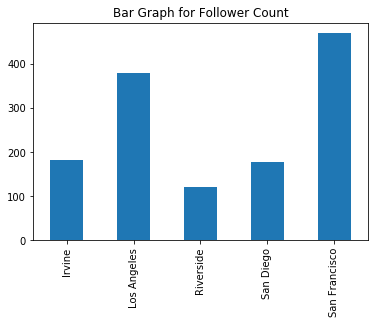

In [85]:
#df_experience_means = df.groupby(['location','experience_count'])['education_count'].mean()
#df_experience_means.plot.pie()
df = df.set_index('location')
irvine_mean = df.loc['Irvine, California'].followers.mean()
los_angeles_mean = df.loc['Los Angeles, California'].followers.mean()
riverside_mean = df.loc['Riverside, California'].followers.mean()
san_diego_mean = df.loc['San Diego, California'].followers.mean()
san_francisco_mean = df.loc['San Francisco, California'].followers.mean()

# simple array 
data = np.array([irvine_mean, los_angeles_mean, riverside_mean, san_diego_mean, san_francisco_mean]) 
  
# providing an index 
ser1 = pd.Series(data, index =['Irvine', 'Los Angeles', 'Riverside', 'San Diego', 'San Francisco']) 
ser1.plot.bar(title = 'Bar Graph for Follower Count')

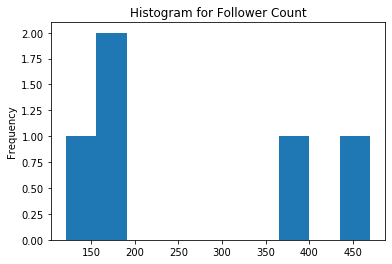

In [86]:
ser1.plot.hist(bins = 10, title = 'Histogram for Follower Count')

What have we learned so far? It is important to note the max values for connections is 500 due to lack of specific followers past 500. But for number of connections, we notice that San Francisco people and Los Angeles people have a much higher average number of connections than Riverside. But high connection count is not as common as having less than 200 connections. We see a bimodal type of distribution where 200-350 followers are substantially decreased. 

Let us now do it for education count

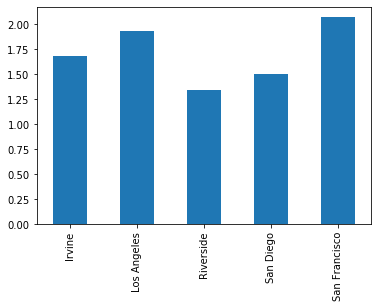

In [87]:
irvine_mean = df.loc['Irvine, California'].education_count.mean()
los_angeles_mean = df.loc['Los Angeles, California'].education_count.mean()
riverside_mean = df.loc['Riverside, California'].education_count.mean()
san_diego_mean = df.loc['San Diego, California'].education_count.mean()
san_francisco_mean = df.loc['San Francisco, California'].education_count.mean()

# simple array 
data = np.array([irvine_mean, los_angeles_mean, riverside_mean, san_diego_mean, san_francisco_mean]) 
  
# providing an index 
ser2 = pd.Series(data, index =['Irvine', 'Los Angeles', 'Riverside', 'San Diego', 'San Francisco']) 
ser2.plot.bar()



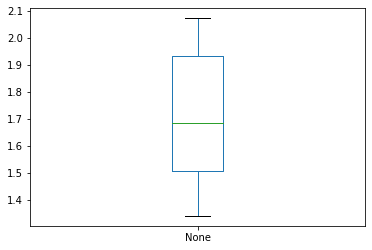

In [88]:
ser2.plot.box()

We notice that San Francisco and Los Angeles again have the most education counts on average with Riverside being the lowest. We should also consider population. We know that Los Angles has an extremely large number of people and Google's page rank algorithm may have slightly divergent influence from the average person hence we are bound to see a higher number of connections/education count of LinkedIn users based purely on population probability. Other than this we can see a slight left skew of education count being towards 2 rather than 1. 

Let us now do experience count

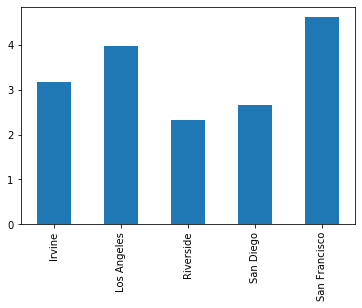

In [89]:
irvine_mean = df.loc['Irvine, California'].experience_count.mean()
los_angeles_mean = df.loc['Los Angeles, California'].experience_count.mean()
riverside_mean = df.loc['Riverside, California'].experience_count.mean()
san_diego_mean = df.loc['San Diego, California'].experience_count.mean()
san_francisco_mean = df.loc['San Francisco, California'].experience_count.mean()

# simple array 
data = np.array([irvine_mean, los_angeles_mean, riverside_mean, san_diego_mean, san_francisco_mean]) 
  
# providing an index 
ser3 = pd.Series(data, index =['Irvine', 'Los Angeles', 'Riverside', 'San Diego', 'San Francisco']) 
ser3.plot.bar()

Here we have nearly an identical breakdown with education count. To mark the distinction let us try and create a scatter plot. Though it may be somewhat weird since we are dealing mainly with whole integers. 

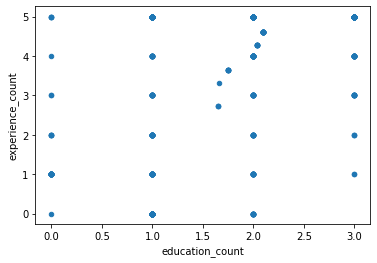

In [90]:
df.plot.scatter(x='education_count', y = 'experience_count')

We see uniformity except with regards to 1.5-2.0 range. Remember that 1.5 (actually slightly bigger) only exists because this is the mean of our education counts for a given city. So, if we focus on that important region, we can see that at least for a small subset of the data, as education count increases, so does experience_count. Especially in the case where there is 3 educations listed, there is at least 1 experience. Now let us see what we can scatterplot with followers. 

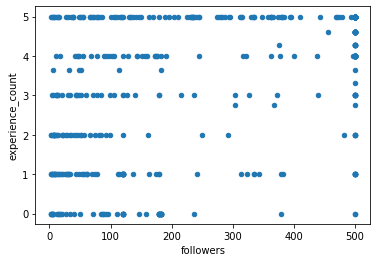

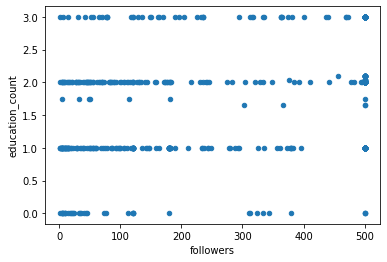

In [91]:
df.plot.scatter(x='followers', y = 'experience_count')
df.plot.scatter(x='followers', y = 'education_count')

As followers increase, for the first plot, we notice that experience count converges (with some outliers) to higher numbers. We also notice the largest data density is with less than 100 followers and still we have very high experience count. 

For the second plot, we see a similar convergence but instead notice that a low number of followers does not show a high number of education counts. In this sense, we may actually want to rely more on education_count in Phase 3 if we notice that it is more influential to follower count. 

## Exploration Part 2

Now let us try and compare unemployment rate with a these features. For convenience sake, let's get the average unemployment rate of each given city of the months listed. Value shows the average unemployment rate and year will be 2018 due to data from 2017-2019. 

In [92]:
os.chdir('unemployment_rates') 
u_irvine = pd.read_csv('unemployment_irvine.csv')
irvine_mean = u_irvine.mean()

In [93]:
print(irvine_mean)

Year     2018.000000
Value       2.938889
dtype: float64


In [94]:
u_los_angeles = pd.read_csv('unemployment_los_angeles.csv')
los_angeles_mean = u_los_angeles.mean()
print(los_angeles_mean)

Year     2018.000000
Value       4.622222
dtype: float64


In [95]:
u_riverside = pd.read_csv('unemployment_riverside.csv')
riverside_mean = u_riverside.mean()
print(riverside_mean)

Year     2018.000000
Value       4.608333
dtype: float64


In [96]:
u_san_diego = pd.read_csv('unemployment_san_diego.csv')
san_diego_mean = u_san_diego.mean()
print(san_diego_mean)

Year     2018.0
Value       3.5
dtype: float64


In [97]:
u_san_francisco = pd.read_csv('unemployment_san_francisco.csv')
san_francisco_mean = u_san_francisco.mean()
print(san_francisco_mean)

Year     2018.000000
Value       2.494444
dtype: float64


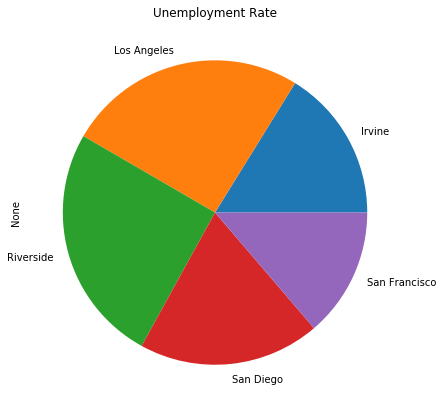

In [98]:
data = np.array([irvine_mean.Value, los_angeles_mean.Value, riverside_mean.Value, san_diego_mean.Value, san_francisco_mean.Value]) 

ser4 = pd.Series(data, index =['Irvine', 'Los Angeles', 'Riverside', 'San Diego', 'San Francisco']) 
ser4.plot.pie(figsize = (7,7), title = 'Unemployment Rate')

We see that Los Angeles and Riverside have the highest unemployment rates. From our earlier analysis we can possibly conclude that in the case of Riverside at least, a lack of connection counts, education counts, and experience counts may indicative of how healthy the employment rate is in that given city. 

Let's take a nice look at exactly the different cities and their unemployment rates throughout the years. 

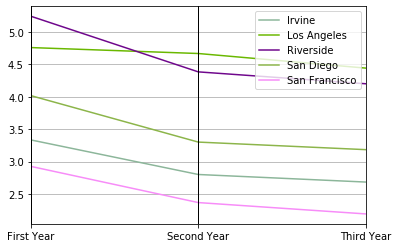

In [99]:
df2 = pd.DataFrame([["Irvine", u_irvine.loc[u_irvine['Year'] == 2017].mean().Value, u_irvine.loc[u_irvine['Year'] == 2018].mean().Value, u_irvine.loc[u_irvine['Year'] == 2019].mean().Value],\
    ["Los Angeles", u_los_angeles.loc[u_los_angeles['Year'] == 2017].mean().Value, u_los_angeles.loc[u_los_angeles['Year'] == 2018].mean().Value,  u_los_angeles.loc[u_los_angeles['Year'] == 2019].mean().Value],\
    ["Riverside", u_riverside.loc[u_riverside['Year'] == 2017].mean().Value, u_riverside.loc[u_riverside['Year'] == 2018].mean().Value, u_riverside.loc[u_riverside['Year'] == 2019].mean().Value],\
    ["San Diego", u_san_diego.loc[u_san_diego['Year'] == 2017].mean().Value,  u_san_diego.loc[u_san_diego['Year'] == 2018].mean().Value,  u_san_diego.loc[u_san_diego['Year'] == 2019].mean().Value],\
    ["San Francisco", u_san_francisco.loc[u_san_francisco['Year'] == 2017].mean().Value, u_san_francisco.loc[u_san_francisco['Year'] == 2018].mean().Value, u_san_francisco.loc[u_san_francisco['Year'] == 2019].mean().Value]],\
    columns=["cities","First Year","Second Year","Third Year"])
parallel_coordinates(df2, class_column='cities', cols=['First Year', 'Second Year', 'Third Year'])

We see that, as exception to Los Angeles, the unemployment rate has been decreasing at a significant magnitude. Los Angeles though seems troublesome though with Riverside showing a steeper negative slope of unemplyment rate. We realize that San Francisco still kept a significant negative slope despite starting with the lowest unemployment rate also. Los Angeles as a city feature will be an interesting analysis opportunity in Phase 3. 

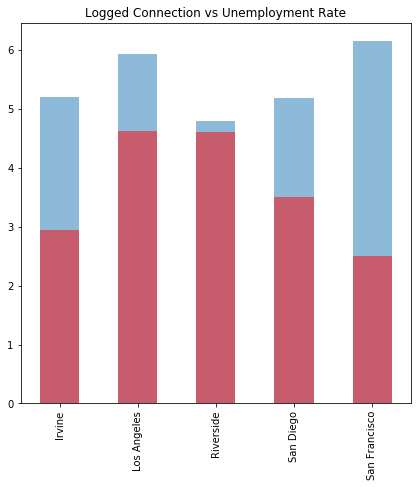

In [100]:
ax = np.log(ser1).plot.bar(figsize = (7,7), alpha = 0.5)
ser4.plot.bar(ax=ax, color = 'red', alpha = 0.5, title = 'Logged Connection vs Unemployment Rate')

From this graph we can see an interesting connection between unemployment rate and connection count. It seems higher connections may be linked to a lower unemployment rate. 

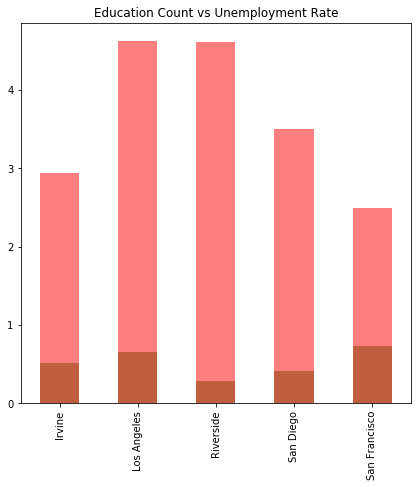

In [101]:
ax = np.log(ser2).plot.bar(figsize = (7,7), color = 'green', alpha = 0.5)
ser4.plot.bar(ax=ax, color = 'red', alpha = 0.5, title = 'Education Count vs Unemployment Rate')

We see that there seems to be another possible connection between education count and unemployment rate especially in the case of San Francisco and Riverside. 

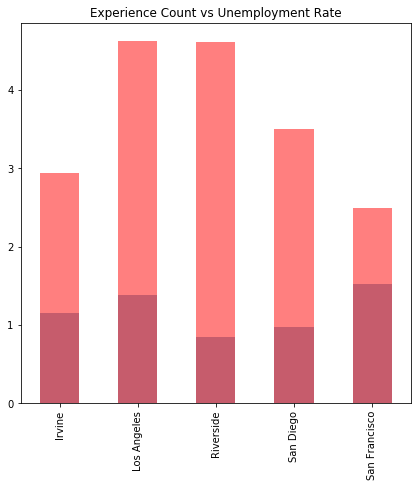

In [102]:
ax = np.log(ser3).plot.bar(figsize = (7,7), alpha = 0.5)
ser4.plot.bar(ax=ax, color = 'red', alpha = 0.5, title = 'Experience Count vs Unemployment Rate')

We finally see how experience count can also be possibly connected. We see San Francisco's high average experience may correlate to the lower unemployment rate in San Francisco. Riverside's low experience count may correlate to it's high unemployment rate. 